In [11]:
import pam
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

In [12]:
(xmin, ymin), (xmax, ymax) = [
    [-0.2875757, 51.5025719],  # bottom left
    [-0.2459907, 51.5114401],  # top right
          ]

In [34]:
def add_grid(xpoints, ypoints, polygons=None):
    if not polygons:
        polygons = []
    for c in range(len(xpoints) - 1):
        for r in range(len(ypoints) - 1):
            polygons.append(
                Polygon(
                    [
                        (xpoints[c], ypoints[r]),
                        (xpoints[c+1], ypoints[r]),
                        (xpoints[c+1], ypoints[r+1]),
                        (xpoints[c], ypoints[r+1])
                    ]
                )
            )
    return polygons

mid = (ymax + ymin) / 2
grid = add_grid(np.linspace(xmin, xmax, 5), np.linspace(ymax, mid, 2))
grid = add_grid(np.linspace(xmin, xmax, 4), np.linspace(mid, ymin, 2), polygons=grid)

grid_df = gpd.GeoDataFrame({'geometry':grid}, index=['A','B','C','D','E','F','G'])
# grid.to_file("grid.shp")

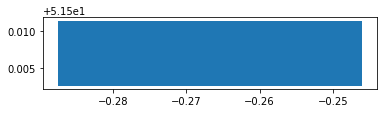

In [35]:
grid_df.plot()

In [36]:
grid_df

,geometry
A,"POLYGON ((-0.28758 51.51144, -0.27718 51.51144..."
B,"POLYGON ((-0.27718 51.51144, -0.26678 51.51144..."
C,"POLYGON ((-0.26678 51.51144, -0.25639 51.51144..."
D,"POLYGON ((-0.25639 51.51144, -0.24599 51.51144..."
E,"POLYGON ((-0.28758 51.50701, -0.27371 51.50701..."
F,"POLYGON ((-0.27371 51.50701, -0.25985 51.50701..."
G,"POLYGON ((-0.25985 51.50701, -0.24599 51.50701..."


In [37]:
from pam.core import Population, Household, Person
from pam.activity import Plan, Activity, Leg
from pam.utils import minutes_to_datetime as mtdt
from pam.variables import END_OF_DAY

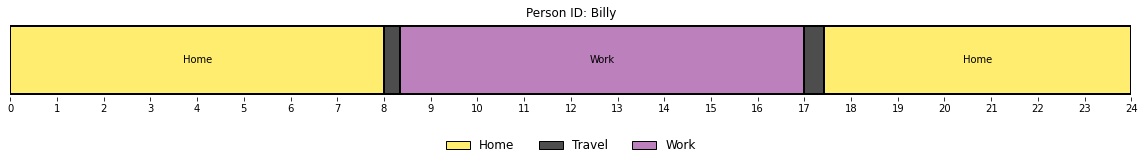

In [61]:
Billy = Person(
  'Billy',
  attributes={'age': 26, 'job': 'employed', 'gender': 'female', 'key_worker': False}
)

Billy.add(
  Activity(
    seq=1,
    act='home',
    area='A',
    start_time=mtdt(0),
    end_time=mtdt(8 * 60)
  )
)
Billy.add(
  Leg(
    seq=1,
    mode='car',
    start_area='A',
    end_area='G',
    start_time=mtdt(8 * 60),
    end_time=mtdt(8 * 60 + 20)
  )
)
Billy.add(
  Activity(
    seq=2,
    act='work',
    area='G',
    start_time=mtdt(8 * 60 + 20),
    end_time=mtdt(17 * 60)
  )
)
Billy.add(
  Leg(
    seq=2,
    mode='car',
    start_area='G',
    end_area='A',
    start_time=mtdt(17 * 60),
    end_time=mtdt(17 * 60 + 25)
  )
)
Billy.add(
  Activity(
    seq=3,
    act='home',
    area='A',
    start_time=mtdt(17 * 60 + 25),
    end_time=END_OF_DAY
  )
)

Billy.plot()

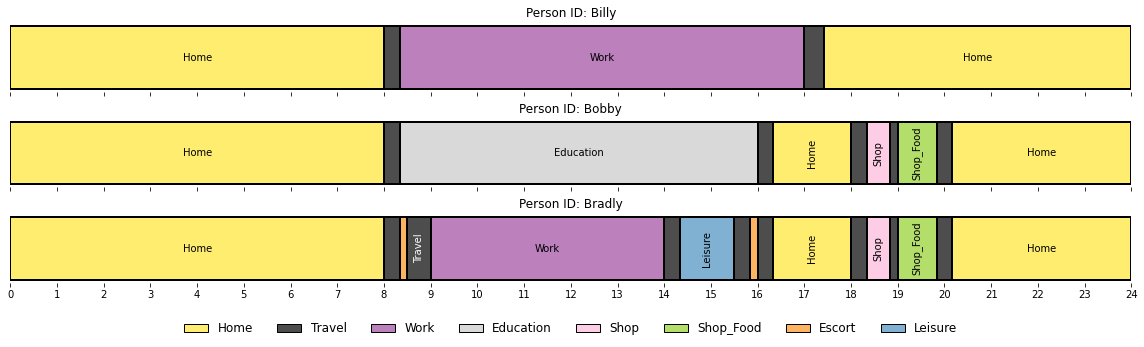

In [62]:
TheSmiths = Household('smith_household')
TheSmiths.add(Billy)

Bobby = Person(
  'Bobby',
  attributes={'age': 8, 'job': 'education', 'gender': 'male', 'key_worker': False}
)

Bobby.add(Activity(1, 'home', 'A', start_time=mtdt(0), end_time=mtdt(8 * 60)))
Bobby.add(Leg(1, 'walk', 'A', 'E', start_time=mtdt(8 * 60), end_time=mtdt(8 * 60 + 20)))
Bobby.add(Activity(2, 'education', 'E', start_time=mtdt(8 * 60 + 20), end_time=mtdt(16 * 60)))
Bobby.add(Leg(2, 'walk', 'E', 'A', start_time=mtdt(16 * 60), end_time=mtdt(16 * 60 + 20)))
Bobby.add(Activity(3, 'home', 'A', start_time=mtdt(16 * 60 + 20), end_time=mtdt(18 * 60)))
Bobby.add(Leg(3, 'car', 'A', 'C', start_time=mtdt(18 * 60), end_time=mtdt(18 * 60 + 20)))
Bobby.add(Activity(4, 'shop', 'B', start_time=mtdt(18 * 60 + 20), end_time=mtdt(18 * 60 + 50)))
Bobby.add(Leg(4, 'car', 'B', 'B', start_time=mtdt(18 * 60 + 50), end_time=mtdt(19 * 60)))
Bobby.add(Activity(5, 'shop_food', 'B', start_time=mtdt(19 * 60), end_time=mtdt(19 * 60 + 50)))
Bobby.add(Leg(5, 'car', 'B', 'A', start_time=mtdt(19 * 60 + 50), end_time=mtdt(20 * 60 + 10)))
Bobby.add(Activity(6, 'home', 'A', start_time=mtdt(20 * 60 + 10), end_time=END_OF_DAY))

Bradly = Person('Bradly', attributes={'age': 37, 'job': 'work', 'gender': 'male', 'key_worker': True})

Bradly.add(Activity(1, 'home', 'A', start_time=mtdt(0), end_time=mtdt(8 * 60)))
Bradly.add(Leg(1, 'walk', 'A', 'E', start_time=mtdt(8 * 60), end_time=mtdt(8 * 60 + 20)))
Bradly.add(Activity(2, 'escort', 'E', start_time=mtdt(8 * 60 + 20), end_time=mtdt(8 * 60 + 30)))
Bradly.add(Leg(2, 'pt', 'E', 'C', start_time=mtdt(8 * 60 + 30), end_time=mtdt(9 * 60)))
Bradly.add(Activity(3, 'work', 'C', start_time=mtdt(9 * 60), end_time=mtdt(14 * 60)))
Bradly.add(Leg(3, 'walk', 'C', 'C', start_time=mtdt(14 * 60), end_time=mtdt(14 * 60 + 20)))
Bradly.add(Activity(4, 'leisure', 'C', start_time=mtdt(14 * 60 + 20), end_time=mtdt(15 * 60 + 30)))
Bradly.add(Leg(4, 'pt', 'C', 'E', start_time=mtdt(15 * 60 + 30), end_time=mtdt(16 * 60 - 10)))
Bradly.add(Activity(5, 'escort', 'E', start_time=mtdt(16 * 60 - 10), end_time=mtdt(16 * 60)))
Bradly.add(Leg(5, 'walk', 'E', 'A', start_time=mtdt(16 * 60), end_time=mtdt(16 * 60 + 20)))
Bradly.add(Activity(6, 'home', 'A', start_time=mtdt(16 * 60 + 20), end_time=mtdt(18 * 60)))
Bradly.add(Leg(6, 'car', 'A', 'B', start_time=mtdt(18 * 60), end_time=mtdt(18 * 60 + 20)))
Bradly.add(Activity(7, 'shop', 'B', start_time=mtdt(18 * 60 + 20), end_time=mtdt(18 * 60 + 50)))
Bradly.add(Leg(7, 'car', 'B', 'B', start_time=mtdt(18 * 60 + 50), end_time=mtdt(19 * 60)))
Bradly.add(Activity(8, 'shop_food', 'C', start_time=mtdt(19 * 60), end_time=mtdt(19 * 60 + 50)))
Bradly.add(Leg(8, 'car', 'B', 'A', start_time=mtdt(19 * 60 + 50), end_time=mtdt(20 * 60 + 10)))
Bradly.add(Activity(9, 'home', 'A', start_time=mtdt(20 * 60 + 10), end_time=END_OF_DAY))

for person in [Bobby, Bradly]:
    TheSmiths.add(person)
    
TheSmiths.plot()